In [ ]:
!ls ../videos/dfdc_train_part_48

In [1]:
import pandas as pd
import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt 

In [2]:
dfdc_train_part_48 = '../videos/dfdc_train_part_48'

In [3]:
conf_threshold = 0.60

In [6]:
modelFile = "res10_300x300_ssd_iter_140000.caffemodel"

configFile = "deploy.prototxt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

In [7]:
df = pd.read_json(dfdc_train_part_48 + '/metadata.json')
df = df.T

In [33]:
df.describe()

,label,original,split
count,2463,2041,2463
unique,2,422,1
top,FAKE,uutxmgqajd.mp4,train
freq,2041,18,2463


In [8]:
df.sample(10)

,label,original,split
omlsbyypkr.mp4,FAKE,qkromhcvfm.mp4,train
mbwmerbjap.mp4,FAKE,sijizvyfxi.mp4,train
qvngqavofg.mp4,REAL,NaN,train
aaferzprat.mp4,REAL,NaN,train
jfighqzpzm.mp4,FAKE,yvowabxoto.mp4,train
lbnuxynggy.mp4,FAKE,zhwltzcxik.mp4,train
xvmqbqczbc.mp4,FAKE,qvngqavofg.mp4,train
tvleyudzsu.mp4,FAKE,uvyxhwohay.mp4,train
rqjkmkaasg.mp4,FAKE,vbcqmyshxr.mp4,train
okiesquksn.mp4,FAKE,zhlhmvpugd.mp4,train


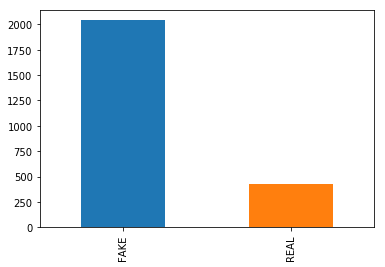

In [32]:
pd.value_counts(df['label']).plot.bar()

In [9]:
def extract_data(path, filename):
    res = []  
    nframe = 0
    v_cap = cv2.VideoCapture(path + '/' + filename)
 
    while(True):
        ret, img = v_cap.read()
        nframe += 1
        
        if ret == True: 
            (h, w) = img.shape[:2]
            blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (103.93, 116.77, 123.68))
        
            net.setInput(blob)
            detections = net.forward()
            for i in range(detections.shape[2]):
                confidence = detections[0, 0, i, 2]
                if confidence > conf_threshold:
                    x1 = int(detections[0, 0, i, 3] * w)
                    y1 = int(detections[0, 0, i, 4] * h)
                    x2 = int(detections[0, 0, i, 5] * w)
                    y2 = int(detections[0, 0, i, 6] * h)
                    res.append({
                        "filename" : filename,
                        "frame" : nframe, 
                        "confidence" : confidence,
                        "h" : y2-y1,
                        "w" : x2-x1
                    })
        
        # Break the loop
        else:
            break 
 
    # When everything done, release the video capture and video write objects
    v_cap.release()
 
    # Closes all the frames
    cv2.destroyAllWindows() 

    return res

In [10]:
result = pd.DataFrame(columns=['filename','frame','confidence','h','w'])

In [11]:
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    rt = extract_data(dfdc_train_part_48, index)
    result = result.append(rt,ignore_index=True)

 19%|█▊        | 460/2463 [51:37<3:48:33,  6.85s/it]

IndexError: list index out of range

In [12]:
result.describe()

,confidence
count,96464.000000
mean,0.870885
std,0.124013
min,0.600002
25%,0.772642
50%,0.906049
75%,0.990097
max,0.999978


In [13]:
result.sample(60)

,filename,frame,confidence,h,w
50931,lhtsqtvtpm.mp4,126,0.999759,355,232
25275,hzrlcndrek.mp4,88,0.740475,1593,800
68047,lkkandgvbi.mp4,163,0.911690,207,187
93793,azpgkhnbfq.mp4,228,0.813319,195,160
1885,hdhosyjdqa.mp4,164,0.913663,204,183
65372,ndlzvtwvke.mp4,292,0.853648,225,157
37856,csrsxklgle.mp4,160,0.754201,258,157
33489,rubozrgvgg.mp4,42,0.789826,255,153
46632,pmwhyvxcvr.mp4,225,0.667003,260,192
44009,dnebeevzpl.mp4,156,0.970343,250,160


In [14]:
result.to_csv('EDA.csv', index=False)

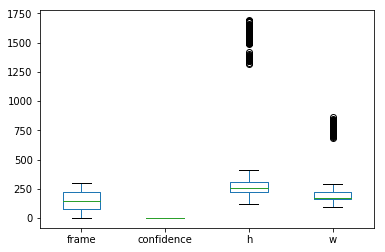

In [15]:
result.plot.box()

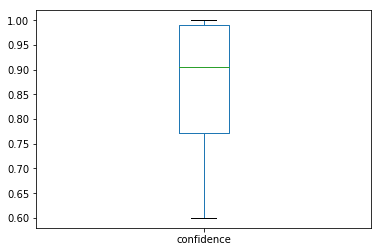

In [16]:
result.confidence.plot.box()

In [18]:
result.query('w>750')

,filename,frame,confidence,h,w
5577,kgsfkfdltq.mp4,16,0.612506,1378,832
5578,kgsfkfdltq.mp4,17,0.629748,1400,809
5582,kgsfkfdltq.mp4,36,0.657431,1524,777
5583,kgsfkfdltq.mp4,38,0.641611,1549,776
5584,kgsfkfdltq.mp4,46,0.625651,1528,768
5585,kgsfkfdltq.mp4,47,0.611920,1517,773
5586,kgsfkfdltq.mp4,48,0.707218,1526,762
5587,kgsfkfdltq.mp4,49,0.697006,1531,757
5588,kgsfkfdltq.mp4,51,0.700867,1561,759
5594,kgsfkfdltq.mp4,57,0.679221,1528,752
